# 安装配置MMSegmentation

按照顺序逐行运行本代码，即可安装配置 MMCV、MMSegmentation环境

推荐代码运行[云GPU环境](https://featurize.cn?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.3

作者：同济子豪兄 2023-1-11 6-11 6-25

> 提示：以下代码运行时，若长时间运行卡着不动，可重启 kernel 后重新运行一遍

## 安装Pytorch

In [1]:
# 安装 Pytorch
!pip3 install install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


## 用MIM安装MMCV

In [2]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.0.0rc4'

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 115.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 130.9 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 99.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 7.1 MB/s eta 0:

## 安装其它工具包

In [3]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install setuptools==59.5 prettytable

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 125.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 170.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 159.9 MB/s eta 0:00:00


## 下载 MMSegmentation

In [5]:
# 删掉原有的 mmsegmentation 文件夹（如有）
!rm -rf mmsegmentation

In [6]:
# 从 github 上下载最新的 mmsegmentation 源代码
!git clone https://github.com/open-mmlab/mmsegmentation.git

正克隆到 'mmsegmentation'...
remote: Enumerating objects: 15569, done.
remote: Counting objects: 100% (1078/1078), done.
remote: Compressing objects: 100% (620/620), done.
remote: Total 15569 (delta 511), reused 762 (delta 383), pack-reused 14491
接收对象中: 100% (15569/15569), 21.01 MiB | 2.72 MiB/s, 完成.
处理 delta 中: 100% (10848/10848), 完成.
正在更新文件: 100% (1385/1385), 完成.


In [4]:
# 进入主目录
import os
os.chdir('mmsegmentation')

## 安装 MMSegmentation

In [5]:
!pip install -v -e .

Using pip 23.1.2 from /home/featurize/work/.local/lib/python3.7/site-packages/pip (python 3.7)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/featurize/work/MMSegmentation%E6%95%99%E7%A8%8B20230625/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  writing manifest file '/tmp/pip-pip-egg-info-s24597j3/mmsegmentation.egg-info/SOURCES.txt'
  Preparing metadata (

## 下载预训练模型权重文件和视频素材

In [9]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

## 下载预训练模型权重至`checkpoint`目录

Model Zoo：https://github.com/open-mmlab/mmsegmentation/blob/master/docs/en/model_zoo.md

In [10]:
# 从 Model Zoo 获取 PSPNet 预训练模型，下载并保存在 checkpoint 文件夹中
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoint


--2023-06-28 21:16:54--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 196205945 (187M) [application/octet-stream]
正在保存至: “checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth”

pspnet_r50-d8_512x1 100%[===================>] 187.12M  10.4MB/s    用时 18s     

2023-06-28 21:17:12 (10.4 MB/s) - 已保存 “checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth” [196205945/196205945])



## 下载素材至`data`目录

如果报错`Unable to establish SSL connection.`，重新运行代码块即可。

In [11]:
# 伦敦街景图片
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

# 上海驾车街景视频，视频来源：https://www.youtube.com/watch?v=ll8TgCZ0plk
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4 -P data

# 街拍视频，2022年3月30日
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data


--2023-06-28 21:17:12--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 469065 (458K) [image/jpeg]
正在保存至: “data/street_uk.jpeg”

street_uk.jpeg      100%[===================>] 458.07K  2.11MB/s    用时 0.2s    

2023-06-28 21:17:13 (2.11 MB/s) - 已保存 “data/street_uk.jpeg” [469065/469065])

--2023-06-28 21:17:13--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 3686362 (3.5M) [video/mp4]
正在保存至: “data/traffic.mp4”

traffic.mp4         100%[===================>]   3.51M  10.4MB/s    用时 0.3s    

2023-06-28 21:17:13 (10.4 MB/s) - 已保存 “data/traffic.mp4” [3686362/3686362])

--2023-06-28 21:17:14--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 13575276 (13M) [v

## 检查安装成功

In [9]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.0+cu113
CUDA 是否可用 True


In [7]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0rc4
CUDA版本 11.3
编译器版本 GCC 9.3


In [8]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


没有报错，即证明安装成功。

## 设置Matplotlib中文字体

In [15]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [16]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [17]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-06-28 21:17:20--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  22.3MB/s    用时 0.4s    

2023-06-28 21:17:20 (22.3 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



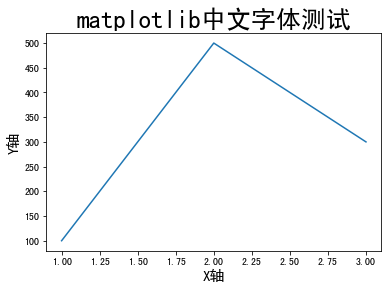

In [18]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()